## Load Packages and Extra Functions

In [2]:
using Statistics, Printf, Dates, DelimitedFiles, Distributions, LinearAlgebra

include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

In [3]:
using Plots

#pyplot(size=(600,400))
gr(size=(480,320))
default(fmt = :svg)

# Load Data from a csv File

In [4]:
x = readdlm("Data/Portfolios_SGLV.csv",',',skipstart=1)  #reading the csv file
                                                         #skip 1st line
println("\nfirst four lines of x:")
printmat(x[1:4,:])

dN = Date.(x[:,1])                             #creating variables
Re  = convert.(Float64,x[:,2:3])               #small growth (SG), large value (LV)
Rme = convert.(Float64,x[:,end]);              #market


first four lines of x:
1970-01-01    -5.480    -4.875    -8.100
1970-02-01     1.465     7.546     5.130
1970-03-01    -7.232     1.061    -1.060
1970-04-01   -24.488    -8.481   -11.000



## Task 1: Means and Standard Deviations

Estimate and print the means and standard deviations of the three series (in `Re` and `Rme`).

In [5]:
println("Mean:")
a = mean([Re Rme], dims=1)
b = std([Re Rme], dims=1)

printmat([a;b],colNames=["SG","LV", "market"],rowNames=["mean","std"])

Mean:
            SG        LV    market
mean     0.218     0.677     0.593
std      8.079     5.772     4.595



## Task 2: Correlations

Estimate and print the correlation matrix.

In [6]:
c = cor([Re Rme])

printmat(c)

     1.000     0.563     0.804
     0.563     1.000     0.774
     0.804     0.774     1.000



## Task 3: OLS

Code up a function to do OLS. It should take `y` and `x` as inputs and return the slope coefficients, the standard errors and R2 as output. Notice that you can calculate the standard erors as follows
1. `cov_b = inv(x'x)*var(u)` where `u` are the residuals
2. `std_b = sqrt.(diag(cov_b))`

Hint: cell 3 (or so) in [OLS notebook on Paul Söderlind's Github](https://github.com/PaulSoderlind/FinancialEconometrics/blob/master/Ch02_OLS1.ipynb)

Then, regress each of return `Re[:,1]` and `Re[:,2]` on the market `Rme` and a constant. Report the coefficients and standard errors.

In [7]:
T = size(Re,1)

c = ones(T)
X = [c Rme]
# b1 = X\Re[:,1]
# b2 = X\Re[:,2]

function OlsGMFn(Y,X)

    T    = size(Y,1)

    b    = X\Y
    Yhat = X*b
    u    = Y - Yhat

    σ2   = var(u)
    cov_b = inv(X'X)*σ2
    std_b = sqrt.(diag(cov_b))
    R2   = 1 - σ2/var(Y)

    return b, std_b, R2

end

(b1, std_b1) = OlsGMFn(Re[:,1],X)
(b2, std_b2) = OlsGMFn(Re[:,2],X)

println("Small growth:\n")
printmat([b1 std_b1],colNames=["coef","stdErr"],rowNames=["c", "Rme (slope)"])
println("Large value:\n")
printmat([b2 std_b2],colNames=["coef","stdErr"],rowNames=["c", "Rme (slope)"])

Small growth:

                 coef    stdErr
c              -0.620     0.196
Rme (slope)     1.414     0.042

Large value:

                 coef    stdErr
c               0.100     0.149
Rme (slope)     0.972     0.032



## Task 4: Scatter Plot

Make a scatter plot of `Rme` (on the horizontal axis) and `SG`. Do the same for `Rme` and `LV`. Add a 45 degree line and also the regression line from OLS.

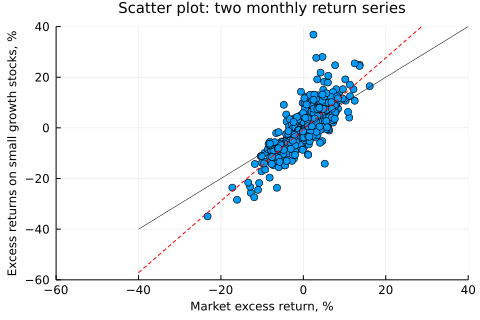

    -0.620     1.414

   -28.895

   -40.000
   -20.000
     0.000
    20.000
    40.000

   -57.169
   -28.895
    -0.620
    27.655
    55.930



In [15]:
xGrid = range(-40,40, length=5)
yLine = b1[1] .+ b1[2]*xGrid

printmat(b1[1], b1[2])
printmat(b1[1] + b1[2]*xGrid[2])
printmat(xGrid)
printmat(yLine)

p1 = scatter( Rme, Re[:,1],
              fillcolor = :blue,
              legend = false,
              xlim = (-60,40),
              ylim = (-60,40),
              title = "Scatter plot: two monthly return series",
              titlefont = font(10),
              xlabel = "Market excess return, %",
              ylabel = "Excess returns on small growth stocks, %",
              guidefont = font(8))
plot!([-40;40],[-40;40],color=:black,linewidth=0.5)   #easier to keep this outside plot()
plot!(xGrid, yLine ,color=:red,linestyle=:dash)   #easier to keep this outside plot()
display(p1)

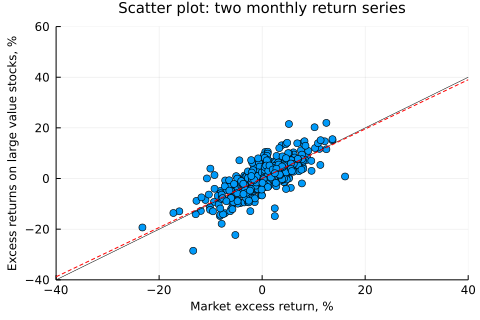

In [9]:
yLine = b2[1] .+ b2[2]*xGrid

p1 = scatter( Rme,Re[:,2],
              fillcolor = :blue,
              legend = false,
              xlim = (-40,40),
              ylim = (-40,60),
              title = "Scatter plot: two monthly return series",
              titlefont = font(10),
              xlabel = "Market excess return, %",
              ylabel = "Excess returns on large value stocks, %",
              guidefont = font(8) )
plot!([-40;60],[-40;60],color=:black,linewidth=0.5)   #easier to keep this outside plot()
plot!(xGrid, yLine ,color=:red,linestyle=:dash)   #easier to keep this outside plot()
display(p1)